## A. EDA

### 1. Univariate Analysis

Using a histogram, plot a distribution of the numerical values

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\张芮静\Desktop\2022 Winter\GNG 5300\Assignment 2\heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


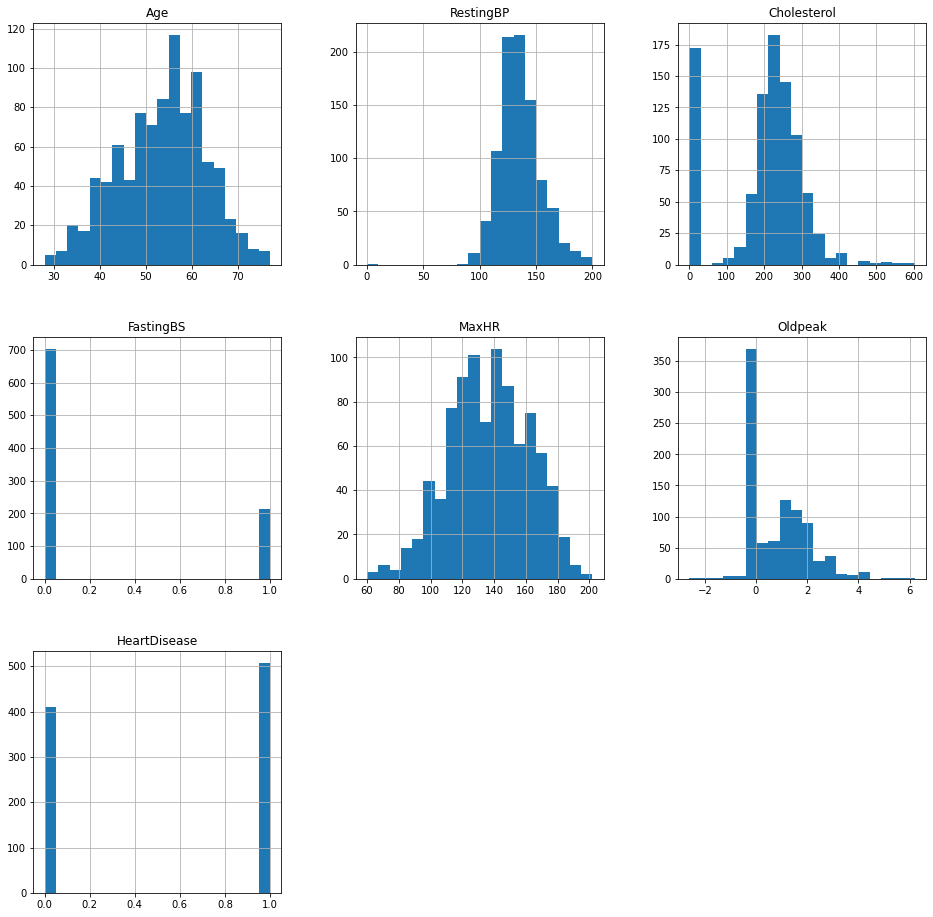

In [4]:
data.hist(bins = 20,figsize = (16,16))
plt.show()

### 2. Bivariate Analysis

Plot a histogram showing the age against the target variable (positive vs. negative cases)

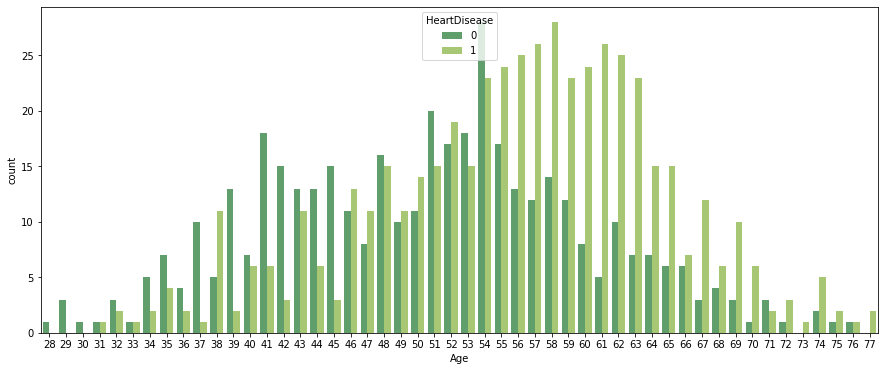

In [5]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = data, hue = 'HeartDisease',palette='summer')
plt.show()

Compare the median age for male and female using a boxplot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

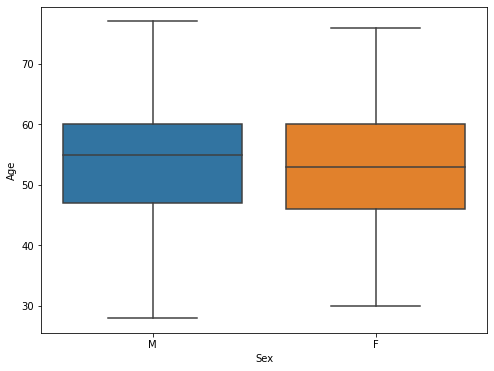

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Sex", y="Age", data = data)

### 3. Multivariate Analysis

Use a heatmap to check for correlation between predictor variables

<AxesSubplot:>

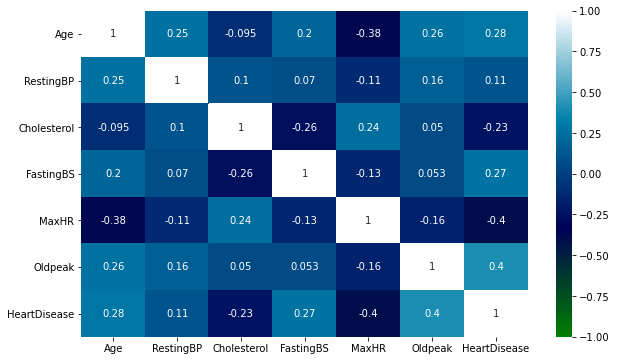

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), vmax=1.,vmin=-1,annot=True, cmap='ocean', fmt='.2g')

*The correlation coefficients in the figure above show that the predictor variables are all available.*

## B. Feature Engineering

### 1. Check for duplicates & missing values. Drop, if present

In [8]:
# Check missing values
missing_data = data.isnull().sum()

In [9]:
missing_data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

*No missing values*

In [10]:
# Check duplicate values
duplicate_data = data.duplicated().sum()

In [11]:
duplicate_data

0

*No duplicate values*

### 2. There are some outliers in the dataset, handle them before building the model

In [12]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


*As can be seen from the above table, the values of RestingBP and Cholesterol are 0 are outliers, and the value of Oldpeak should not have negative values, so the outliers of RestingBP, Cholesterol, and Oldpeak are processed.*

In [13]:
# Handling outliers of RestingBP
data[data.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


*Since there is only one outlier in RestingBP, and the data in row 449 has more than one outlier, it is decided to drop this row of data.*

In [14]:
data = data.drop([449])

In [15]:
# Check the result after dropping outliers
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
# Handling outliers of Oldpeak
data[data.Oldpeak < 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


*Since the outliers in Oldpeak all have corresponding positive values, and the number of outliers is small, it is decided to convert the outliers to corresponding positive numbers.*

In [17]:
data['Oldpeak'] = data['Oldpeak'].abs()

In [18]:
# Check the result after converting outliers
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.914613,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.043102,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [19]:
# Handling outliers of Cholesterol
data[data.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


*Since the number of outliers in Cholesterol is high and they are all 0, the mean is used instead of outliers.*

In [20]:
No_out = data[data.Cholesterol > 0]
mean = np.mean(No_out['Cholesterol'])
data['Cholesterol'].replace(0, mean, inplace = True)

In [21]:
# Check the result after replacing outliers
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.914613,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.043102,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 3. Check for class imbalance and handle, if necessary

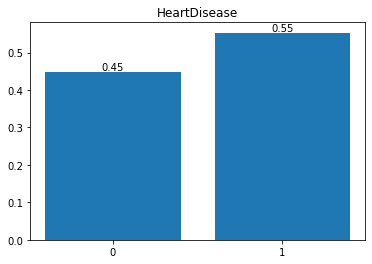

In [22]:
HeartDisease_0 = (data.HeartDisease == 0).astype(int).sum(axis=0)
HeartDisease_1 = (data.HeartDisease == 1).astype(int).sum(axis=0)

H_0 = HeartDisease_0/(HeartDisease_0 + HeartDisease_1)
H_1 = HeartDisease_1/(HeartDisease_0 + HeartDisease_1)

x = [0,1]
y = [H_0,H_1]

fig, ax = plt.subplots()
b = ax.bar(x, y)
for a, b in zip(x, y):
    ax.text(a, b, '%.2f' %b, ha='center', va='bottom')

plt.title('HeartDisease')
plt.xticks(range(len(x)))
plt.show()

*By calculating the proportion of 0 and 1 in HeartDisease, it can be seen that the proportion of 1 is slightly more than the median value of 0.5, and the proportion of 0 is slightly less than the median value of 0.5. Although it is not an ideal binary distribution, it does not constitute the class imbalance.*

### 4. Convert categorical data into numerical data using one-hot encoding or any other label encoding approach

In [23]:
numerical_features= data.select_dtypes(include='number').columns.to_list()
numerical_features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [24]:
categorical_features= data.select_dtypes(exclude='number').columns.to_list()
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

*It can be seen from the above classification that although the dataset has been distinguished according to the two categories of characters and numbers, this classification cannot be used directly.For numeric features, the HeartDisease should not be included in the operation, it is the only dependent variable in our entire dataset, so it is removed. In addition, although the FastingBS feature is numeric data, since it is already classified by numbers, it is put into categorical features for classification and encoding.*

In [25]:
# Reclassify the features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

In [26]:
# Using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

label_encoding = OneHotEncoder(dtype=int,sparse=False)
New_1 = pd.DataFrame(label_encoding.fit_transform(data[categorical_features]), columns = label_encoding.get_feature_names_out(), index=data.index)
data_x = pd.concat([data, New_1], axis=1)
data_x.drop(categorical_features, axis=1, inplace=True)

# Check if encoding was successful
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   RestingBP          917 non-null    int64  
 2   Cholesterol        917 non-null    float64
 3   MaxHR              917 non-null    int64  
 4   Oldpeak            917 non-null    float64
 5   HeartDisease       917 non-null    int64  
 6   Sex_F              917 non-null    int32  
 7   Sex_M              917 non-null    int32  
 8   ChestPainType_ASY  917 non-null    int32  
 9   ChestPainType_ATA  917 non-null    int32  
 10  ChestPainType_NAP  917 non-null    int32  
 11  ChestPainType_TA   917 non-null    int32  
 12  RestingECG_LVH     917 non-null    int32  
 13  RestingECG_Normal  917 non-null    int32  
 14  RestingECG_ST      917 non-null    int32  
 15  ExerciseAngina_N   917 non-null    int32  
 16  ExerciseAngina_Y   917 non

In [27]:
data_x

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1
0,40,140,289.0,172,0.0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
1,49,160,180.0,156,1.0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,37,130,283.0,98,0.0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,1,0
3,48,138,214.0,108,1.5,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,54,150,195.0,122,0.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,132,1.2,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
914,68,144,193.0,141,3.4,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
915,57,130,131.0,115,1.2,1,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
916,57,130,236.0,174,0.0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0


### 5. Scale the data using a standard scaler

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
New_2 = pd.DataFrame(scaler.fit_transform(data[numerical_features]), columns=['scaler_'+x for x in numerical_features], index=data_x.index)
data_x = pd.concat([data_x, New_2], axis=1)
data = data_x.drop(numerical_features, axis=1)

# Check if standardization was successful
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HeartDisease        917 non-null    int64  
 1   Sex_F               917 non-null    int32  
 2   Sex_M               917 non-null    int32  
 3   ChestPainType_ASY   917 non-null    int32  
 4   ChestPainType_ATA   917 non-null    int32  
 5   ChestPainType_NAP   917 non-null    int32  
 6   ChestPainType_TA    917 non-null    int32  
 7   RestingECG_LVH      917 non-null    int32  
 8   RestingECG_Normal   917 non-null    int32  
 9   RestingECG_ST       917 non-null    int32  
 10  ExerciseAngina_N    917 non-null    int32  
 11  ExerciseAngina_Y    917 non-null    int32  
 12  ST_Slope_Down       917 non-null    int32  
 13  ST_Slope_Flat       917 non-null    int32  
 14  ST_Slope_Up         917 non-null    int32  
 15  FastingBS_0         917 non-null    int32  
 16  FastingB

In [29]:
data

,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1,scaler_Age,scaler_RestingBP,scaler_Cholesterol,scaler_MaxHR,scaler_Oldpeak
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,1,0,-1.432206,0.414627,0.832075,1.383339,-0.877299
1,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,-0.478057,1.526360,-1.212261,0.754736,0.081904
2,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,-1.750256,-0.141240,0.719543,-1.523953,-0.877299
3,1,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,-0.584074,0.303453,-0.574578,-1.131075,0.561505
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0.052026,0.970493,-0.930931,-0.581047,-0.877299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,-0.902124,-1.252973,0.363191,-0.188170,0.273744
914,1,0,1,1,0,0,0,0,1,0,...,0,1,0,0,1,1.536257,0.636973,-0.968441,0.165420,2.383989
915,1,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,0.370075,-0.141240,-2.131275,-0.856061,0.273744
916,1,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0.370075,-0.141240,-0.161960,1.461915,-0.877299


## C. Model Development I

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [31]:
# Split the data
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

X.shape, y.shape

((917, 21), (917,))

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42) # splitting data in 70% train, 30%test

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((641, 21), (641,), (276, 21), (276,))

### Ensemble Method:

Use a majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT (ensure you find optimal tree), and XGboost classifiers based on a soft voting (i.e., weighted average) approach. Note: In majority voting, the predicted class label for a particular sample is the class label that represents the majority of the class labels predicted by each individual classifier.

In [33]:
# Applying Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# redict on test data
y_predicted = knn.predict(X_test)

print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Accuracy:\n",accuracy_score(y_test,y_predicted))
print("\n F1:\n",f1_score(y_test,y_predicted))


 Precision score is:
 0.8988095238095238

 Recall score is:
 0.893491124260355

 Accuracy:
 0.8731884057971014

 F1:
 0.8961424332344214


In [34]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# redict on test data
y_predicted = svm.predict(X_test)

print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Accuracy:\n",accuracy_score(y_test,y_predicted))
print("\n F1:\n",f1_score(y_test,y_predicted))


 Precision score is:
 0.9141104294478528

 Recall score is:
 0.8816568047337278

 Accuracy:
 0.8768115942028986

 F1:
 0.8975903614457832


In [35]:
#Applying Decision Tree
from sklearn import tree

#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3)

#Train DT based on scaled training set
decision_tree.fit(X_train, y_train)

# redict on test data
y_predicted = decision_tree.predict(X_test)

print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Accuracy:\n",accuracy_score(y_test,y_predicted))
print("\n F1:\n",f1_score(y_test,y_predicted))


 Precision score is:
 0.9125

 Recall score is:
 0.863905325443787

 Accuracy:
 0.8659420289855072

 F1:
 0.8875379939209725


In [36]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# redict on test data
y_predicted = xgb_clf.predict(X_test)

print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Accuracy:\n",accuracy_score(y_test,y_predicted))
print("\n F1:\n",f1_score(y_test,y_predicted))

D:\Anaconda\Setup\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Precision score is:
 0.9056603773584906

 Recall score is:
 0.8520710059171598

 Accuracy:
 0.855072463768116

 F1:
 0.8780487804878049


In [37]:
# Ensemble Voting
import mlxtend
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import metrics

ECH = EnsembleVoteClassifier(clfs=[knn, svm, decision_tree, xgb_clf], voting='hard')
ECS = EnsembleVoteClassifier(clfs=[knn, svm, decision_tree, xgb_clf], voting='soft', weights=[1,2,1,1])
for clf, label in zip([ECH, ECS],
                      ['Ensemble Hard Voting',
                       'Ensemble Soft Voting']):
    clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

E_precision = precision_score(y_test,y_predicted)
E_recall = recall_score(y_test,y_predicted)
E_accuracy = accuracy_score(clf.predict(X_test), y_test)
E_f1 = f1_score(y_test,y_predicted)

print("\n Precision score is:\n",precision_score(y_test,y_predicted))
print("\n Recall score is:\n",recall_score(y_test,y_predicted))
print("\n Accuracy:\n",accuracy_score(clf.predict(X_test), y_test))
print("\n F1:\n",f1_score(y_test,y_predicted))

D:\Anaconda\Setup\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\Setup\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Precision score is:
 0.9212121212121213

 Recall score is:
 0.8994082840236687

 Accuracy:
 0.8913043478260869

 F1:
 0.9101796407185629


*Through the integration of several classifiers, it can be seen that the integrated classifier outperforms the performance of each classifier working alone. Since the soft voting method can adjust the weight of each classifier in the ensemble process, I increased the weight of the best performing SVM classifier to obtain a better performing ensemble model.*

## D. Model Development II

### Deep Learning:

Train a deep neural network using Keras with 3 dense layers

In [38]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [39]:
# Train a 3 dense layers deep neural network model
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, epochs=20, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Epoch 1/20
21/21 [==============================] - 1s 1ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 2/20
21/21 [==============================] - 0s 1ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 3/20
21/21 [==============================] - 0s 1ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 4/20
21/21 [==============================] - 0s 2ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 5/20
21/21 [==============================] - 0s 2ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 6/20
21/21 [==============================] - 0s 2ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 7/20
21/21 [==============================] - 0s 2ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 8/20
21/21 [==============================] - 0s 1ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 9/20
21/21 [==============================] - 0s 2ms/step - loss: 6.2859e-08 - accuracy: 0.3713
Epoch 10/20
21/21 [==============================] - 0s 1ms/step - loss: 6.2859e-0

Try changing the activation function or dropout rate. What effects does any of these have on the result?

In [41]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Activation("softmax"))

model.add(Dense(16))

model.add(Dense(1))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                704       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 1ms/step - loss: 7.2994e-08 - accuracy: 0.3877
The accuracy of the Neural Network classifier on test data is = 0.39


*By adding an activation layer to the first layer of the neural network, it can be seen that the accuracy decreases.*

In [42]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Activation("softmax"))

model.add(Dense(16))
model.add(Activation("softmax"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                704       
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 1ms/step -

*By adding another activation layer to the second layer of the neural network, it can be seen that the accuracy has not changed.*

In [43]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Activation("softmax"))

model.add(Dense(16))
model.add(Activation("softmax"))

model.add(Dense(1))
model.add(Activation("softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                704       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 activation_4 (Activation)   (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-traina

*By continuing to add an activation layer to the third layer of the neural network, it can be seen that the accuracy has improved, exceeding the accuracy of the original model without an activation layer.*

In [44]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(16))

model.add(Dense(1))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                704       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 1ms/step - loss: 7.2994e-08 - accuracy: 0.5543
The accuracy of the Neural Network classifier on test data is = 0.55


*A slight decrease in accuracy can be seen by adding a dropout layer to the first layer of the neural network.*

In [45]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(16))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(1))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                704       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
9/9 [==============================] - 0s 1ms/step -

*By adding a dropout layer to the second layer of the neural network, it can be seen that the accuracy increases and exceeds the accuracy of the original model without the dropout layer added.*

In [46]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(16))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(1))
model.add(Dropout(rate = 0.1, seed = 100))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                704       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
 dropout_5 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-traina

*By continuing to add a dropout layer to the third layer of the neural network, the accuracy is drastically reduced.*

*By adding an activation layer or a drop layer to this three-layer neural network, it can be seen that adding an activation layer or a dropout layer will affect the accuracy. For the activation layer, adding it in the third layer can improve the accuracy. For the dropout layer, adding the first and second layers can improve the accuracy. Therefore, it can be seen that whether it is adding an activation layer or a dropout layer, whether it is added in the any layers of the original model, it is necessary to try to get the result.*

*In order to improve the accuracy of the neural network, the activation layer and the dropout layer are added to the original model, and the results are as follows:*

In [47]:
model=Sequential()

model.add(Dense(32, input_shape=(21,)))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(16))
model.add(Dropout(rate = 0.1, seed = 100))

model.add(Dense(1))
model.add(Activation("softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

model.fit(X_train, y_train, epochs = 20, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("The accuracy of the Neural Network classifier on test data is = {:.2f}".format(accuracy))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                704       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
 activation_6 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-traina

In [48]:
y_pred = model.predict(X_test)
k = y_pred.reshape(276)
y_pred = np.where(k > 0.5, 1, 0)

D_precision = precision_score(y_test,y_pred)
D_recall = recall_score(y_test,y_pred)
D_accuracy = accuracy_score(y_test,y_pred)
D_f1 = f1_score(y_test,y_pred)

print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Accuracy:\n",accuracy_score(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))


 Precision score is:
 0.6123188405797102

 Recall score is:
 1.0

 Accuracy:
 0.6123188405797102

 F1:
 0.7595505617977528


## E. Model Comparison, Evaluation

### Compare the results of the ensemble with the deep neural network model in terms of the following criteria: precision, recall, accuracy, F-measure.

In [49]:
print("\nThe precision score of the ensemble model is:",E_precision)
print("The precision score of the deep neural network model is:",D_precision)

print("\nThe recall score of the ensemble model is:",E_recall)
print("The recall score of the deep neural network model is:",D_recall)

print("\nThe accuracy of the ensemble model is:",E_accuracy)
print("The accuracy of the deep neural network model is:",D_accuracy)

print("\nThe f1 score of the ensemble model is:",E_f1)
print("The f1 score of the deep neural network model is:",D_f1)


The precision score of the ensemble model is: 0.9212121212121213
The precision score of the deep neural network model is: 0.6123188405797102

The recall score of the ensemble model is: 0.8994082840236687
The recall score of the deep neural network model is: 1.0

The accuracy of the ensemble model is: 0.8913043478260869
The accuracy of the deep neural network model is: 0.6123188405797102

The f1 score of the ensemble model is: 0.9101796407185629
The f1 score of the deep neural network model is: 0.7595505617977528


### Identify the model that performed best and worst according to each criterion.

*Through the above comparison, it can be seen that the deep learning model is better than the ensemble model in the performance of recall score, but the ensemble model is better than the deep learning model in the remaining precision score, accuracy and f1 score. Overall, the ensemble model significantly outperforms the deep learning model.*